In [15]:
!pip install pandas numpy matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Assignment 1
## Ziad Arafat

### 1.

1. We read in the CSV using the pandas library and store it in a dataframe. 
2. We print the data in the first two rows using the `head()` method

In [2]:
df_default_credit = pd.read_csv("Default-of-Credit-Card-Clients.csv")
print(df_default_credit.head(n=2))

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  

[2 rows x 25 columns]


### 2.

1. The `dtypes` attribute contains all the types of each column and simply placing it in the cell will list out each column name and the corresponding type. 

In [3]:
df_default_credit.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

### 3.

1. We can get both rows and columns count using the `shape` attribute.

In [4]:
print("Columns: ", df_default_credit.shape[0])
print("Rows: ", df_default_credit.shape[1])

Columns:  30000
Rows:  25


### 4.

1. The `unique()` method gives us a list of unique values in a column
2. We sort it so it's nicer to look at. 


In [5]:
print(sorted(df_default_credit['EDUCATION'].unique()))

[0, 1, 2, 3, 4, 5, 6]


### 5.

1. `value_counts()` will give us a table of the classes and their counts. 


In [6]:
df_default_credit['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

### 6.

1. The `len()` function and the conditional syntax of pandas allows us to count how many entries match these conditions.  


In [7]:
len(df_default_credit[(df_default_credit['default payment next month'] == 1) 
                      & (df_default_credit['MARRIAGE'] == 1)])

3206

### 7.

1. We can use a similar syntax for the age condition . 


In [8]:
len(df_default_credit[(df_default_credit['default payment next month'] == 1) 
                      & (df_default_credit['AGE'] > 30)])

4165

### 8.

1. We can now use the `mean()` method to get the mean of the LIMIT_BAL column after filtering by conditions .
2. We do one for male (1) and then female (2) 


In [9]:
df_default_credit[(df_default_credit['SEX'] == 1)]["LIMIT_BAL"].mean()

163519.8250336474

In [10]:
df_default_credit[(df_default_credit['SEX'] == 2)]["LIMIT_BAL"].mean()

170086.46201413427

### 9.

1. First we can filter by age and select the default payment column. 
2. Then we can create a histogram for the default payment column using the `hist()` method and we can make the ticks only 0 and 1 using the `xticks` method.
3. We repeat this for $\leq 30$ and $> 30$


(array([8542., 2471.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

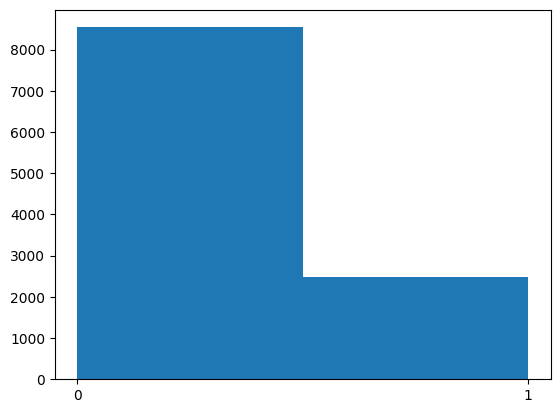

In [11]:
default_leq_30 = df_default_credit[(df_default_credit['AGE'] <= 30)]["default payment next month"]

plt.xticks(np.arange(min(default_leq_30), max(default_leq_30)+1, 1.0))
plt.hist(default_leq_30,bins=2)

(array([14822.,  4165.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

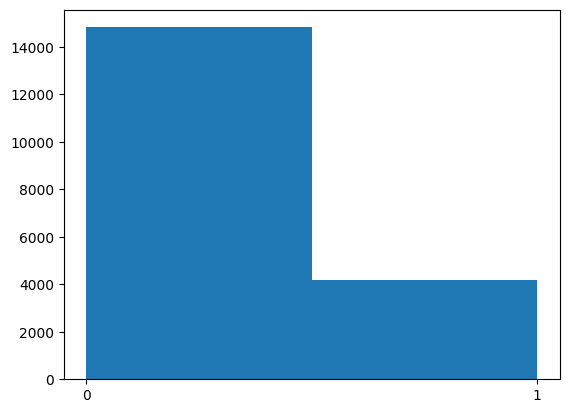

In [12]:
default_gt_30 = df_default_credit[(df_default_credit['AGE'] > 30)]["default payment next month"]

plt.xticks(np.arange(min(default_gt_30), max(default_gt_30)+1, 1.0))
plt.hist(default_gt_30,bins=2)

### 10.

1. Using matplotlib we can make a scatter plot. 
2. Because the plot using all the data is extremely dense and difficult to interpret we can select a random sample from the data that is still representative. 
3. Additionally we can give the dots some transparency so we can see where they overlap and we can make them a bit smaller so it looks clearer .


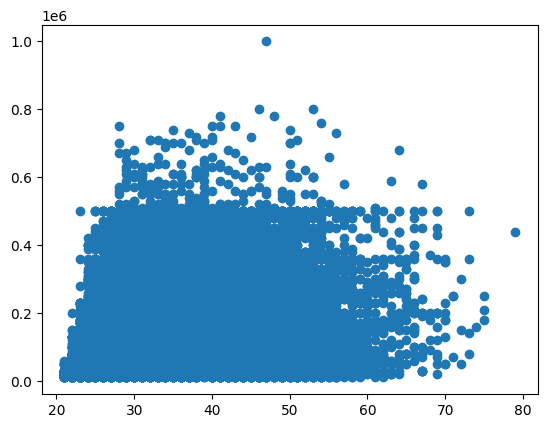

In [13]:
x_age = df_default_credit["AGE"]
y_limit_bal = df_default_credit["LIMIT_BAL"]

plt.scatter(x_age, y_limit_bal)

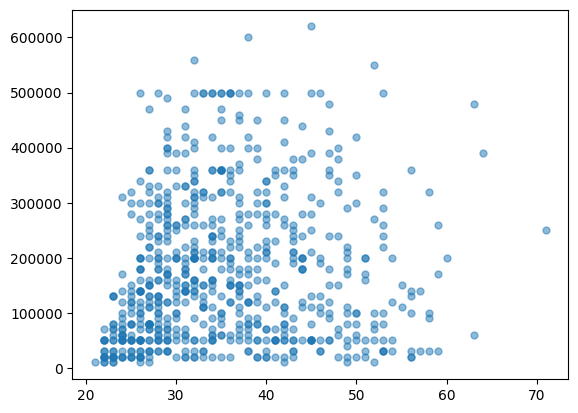

In [14]:
x_age = df_default_credit["AGE"].sample(n=35*20, random_state=1)
y_limit_bal = df_default_credit["LIMIT_BAL"].sample(n=35*20, random_state=1)

plt.scatter(x_age, y_limit_bal,alpha=0.5, s=25)